In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wal=pd.read_csv(r"D:\Scaler projects\walmart\walmart.csv")

In [3]:
wal

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
wal.shape

(550068, 10)

In [5]:
wal.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
wal.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [9]:
wal["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [10]:
wal["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [11]:
#% of data consists of Males
wal["Gender"].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [12]:
wal["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [13]:
#% of data consists of married
wal["Marital_Status"].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

In [14]:
wal["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [15]:
#% of most selling product category
wal["Product_Category"].value_counts(normalize=True)*100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

In [16]:
wal["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [17]:
wal["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [18]:
wal["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [19]:
wal["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [20]:
wal["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [21]:
wal["Product_ID"].nunique()

3631

<AxesSubplot:xlabel='Product_ID', ylabel='count'>

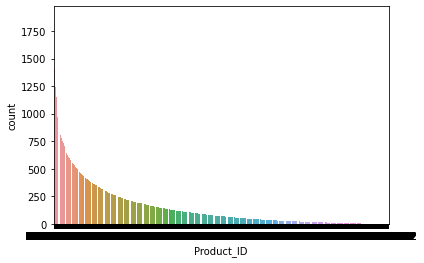

In [22]:
sns.countplot(data=wal,x="Product_ID", order=wal["Product_ID"].value_counts().index)

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

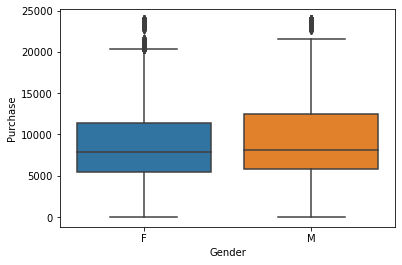

In [23]:
# bivariate analysis
#Purchase amount Vs Gender
sns.boxplot(data=wal,y="Purchase",x="Gender")

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

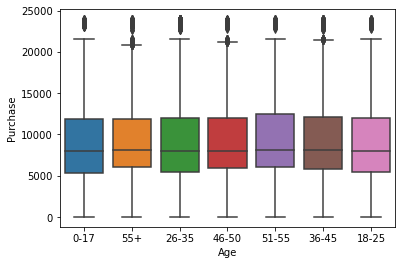

In [24]:
#Purchase amount Vs Age
sns.boxplot(data=wal,y="Purchase",x="Age")

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

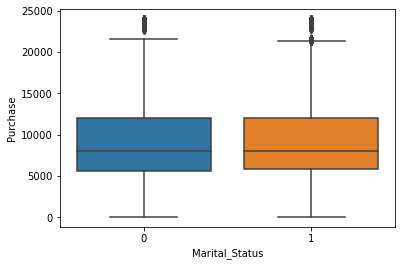

In [25]:
#Purchase amount Vs Marital_Status
sns.boxplot(data=wal,y="Purchase",x="Marital_Status")

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

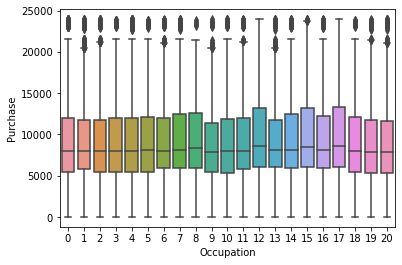

In [26]:
#Purchase amount Vs Occupation
sns.boxplot(data=wal,y="Purchase",x="Occupation")

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

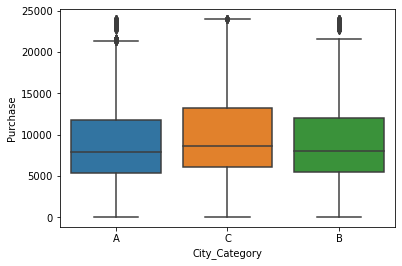

In [27]:
#Purchase amount Vs City_Category
sns.boxplot(data=wal,y="Purchase",x="City_Category")

In [28]:
#Categoriacal vs categorical
#product_categorey Vs various attributes

In [29]:
df_wal=wal.groupby(["Product_Category","Gender"]).size().reset_index().pivot(columns="Gender",index="Product_Category")

In [30]:
df_wal

0        
Gender                F       M
Product_Category               
1                 24831  115547
2                  5658   18206
3                  6006   14207
4                  3639    8114
5                 41961  108972
6                  4559   15907
7                   943    2778
8                 33558   80367
9                    70     340
10                 1162    3963
11                 4739   19548
12                 1532    2415
13                 1462    4087
14                  623     900
15                 1046    5244
16                 2402    7426
17                   62     516
18                  382    2743
19                  451    1152
20                  723    1827

<AxesSubplot:xlabel='Product_Category'>

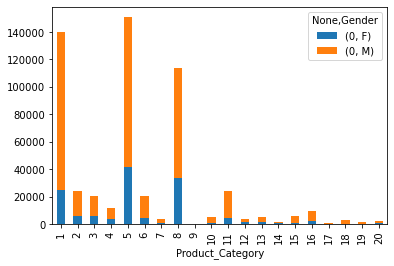

In [31]:
df_wal.plot(kind="bar",stacked=True)

In [32]:
df_wal=wal.groupby(["Product_Category","Marital_Status"]).size().reset_index().pivot(columns="Marital_Status",index="Product_Category")

In [33]:
df_wal

0       
Marital_Status        0      1
Product_Category              
1                 84375  56003
2                 14138   9726
3                 12359   7854
4                  7177   4576
5                 89656  61277
6                 12139   8327
7                  2040   1681
8                 65411  48514
9                   247    163
10                 2778   2347
11                14668   9619
12                 2034   1913
13                 3162   2387
14                  846    677
15                 3623   2667
16                 5713   4115
17                  298    280
18                 1641   1484
19                  946    657
20                 1480   1070

<AxesSubplot:xlabel='Product_Category'>

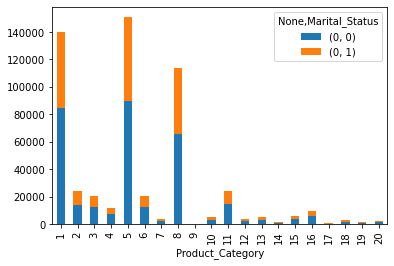

In [34]:
df_wal.plot(kind="bar",stacked=True)

In [35]:
df_wal2=wal.groupby(["Product_Category","City_Category"]).size().reset_index().pivot(columns="City_Category",index="Product_Category")

In [36]:
df_wal2

0              
City_Category         A      B      C
Product_Category                     
1                 35081  58253  47044
2                  6141  10444   7279
3                  4943   8587   6683
4                  3050   5226   3477
5                 42211  64138  44584
6                  5507   8526   6433
7                  1226   1599    896
8                 32179  47553  34193
9                   110    174    126
10                 1333   2063   1729
11                 6601  10485   7201
12                 1063   1675   1209
13                 1614   2271   1664
14                  481    632    410
15                 1717   2638   1935
16                 2848   4038   2942
17                  121    267    190
18                  753   1389    983
19                  273    462    868
20                  468    753   1329

<AxesSubplot:xlabel='Product_Category'>

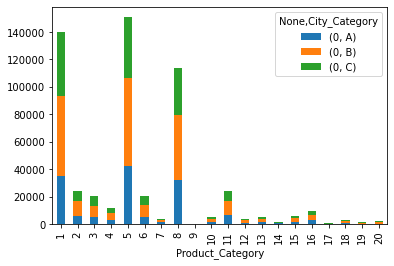

In [37]:
df_wal2.plot(kind="bar",stacked=True)

In [38]:
#Stay_In_Current_City_Years

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

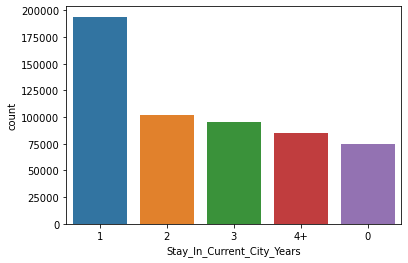

In [39]:
sns.countplot(data=wal,x="Stay_In_Current_City_Years", order=wal["Stay_In_Current_City_Years"].value_counts().index)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

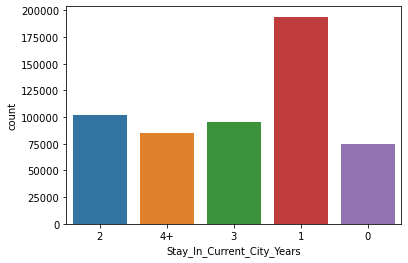

In [40]:
sns.countplot(data=wal,x="Stay_In_Current_City_Years")

<AxesSubplot:xlabel='Gender', ylabel='count'>

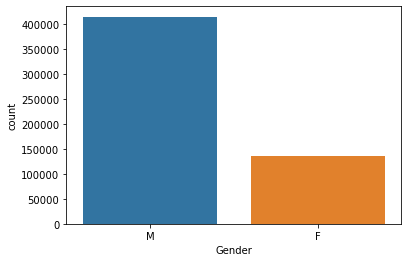

In [41]:
sns.countplot(data=wal,x="Gender", order=wal["Gender"].value_counts().index)

<AxesSubplot:xlabel='Age', ylabel='count'>

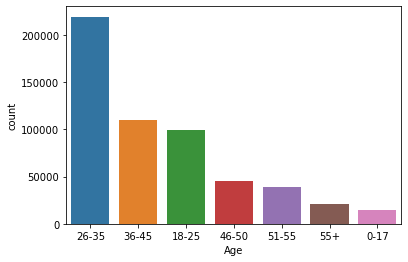

In [42]:
sns.countplot(data=wal,x="Age", order=wal["Age"].value_counts().index)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

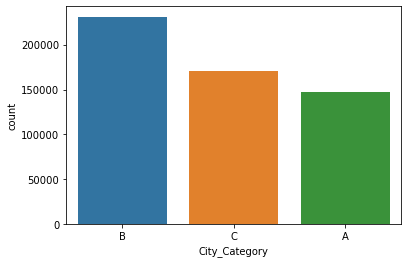

In [43]:
sns.countplot(data=wal,x="City_Category", order=wal["City_Category"].value_counts().index)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

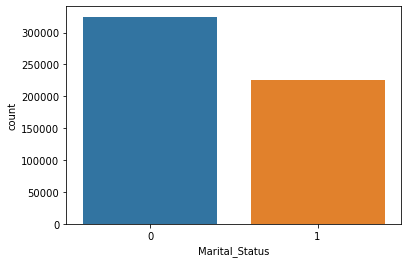

In [44]:
sns.countplot(data=wal,x="Marital_Status", order=wal["Marital_Status"].value_counts().index)

In [45]:
#Probability Analysis

In [46]:
pd.crosstab(index=wal["Product_Category"],columns=wal["Gender"],margins=True,normalize=True)*100

Gender,F,M,All
Product_Category,,,
1,4.514169,21.005948,25.520118
2,1.028600,3.309773,4.338373
3,1.091865,2.582772,3.674637
4,0.661555,1.475090,2.136645
5,7.628330,19.810642,27.438971
6,0.828807,2.891824,3.720631
7,0.171433,0.505028,0.676462
8,6.100700,14.610375,20.711076
9,0.012726,0.061811,0.074536


In [47]:
pd.crosstab(index=wal["Product_Category"],columns=wal["Age"],margins=True,normalize=True)*100

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Product_Category,,,,,,,,
1,0.651738,4.901576,10.589418,5.026288,1.904128,1.645069,0.801901,25.520118
2,0.146346,0.804991,1.623072,0.892981,0.382680,0.323778,0.164525,4.338373
3,0.218155,0.856258,1.392919,0.700641,0.250151,0.167979,0.088535,3.674637
4,0.137801,0.447763,0.762088,0.427947,0.179978,0.123257,0.057811,2.136645
5,0.787175,5.185177,11.175527,5.340612,2.176276,1.798505,0.975698,27.438971
6,0.072536,0.681552,1.542537,0.708821,0.294873,0.263604,0.156708,3.720631
7,0.009635,0.087444,0.300145,0.147073,0.059447,0.048358,0.024361,0.676462
8,0.410495,3.256143,8.045551,4.235113,1.937215,1.697972,1.128588,20.711076
9,0.002909,0.011453,0.027997,0.019452,0.005999,0.005272,0.001454,0.074536


In [48]:
pd.crosstab(index=wal["Product_Category"],columns=wal["Marital_Status"],margins=True,normalize=True)*100

Marital_Status,0,1,All
Product_Category,,,
1,15.339013,10.181105,25.520118
2,2.570228,1.768145,4.338373
3,2.246813,1.427823,3.674637
4,1.304748,0.831897,2.136645
5,16.299076,11.139895,27.438971
6,2.206818,1.513813,3.720631
7,0.370863,0.305599,0.676462
8,11.891439,8.819637,20.711076
9,0.044904,0.029633,0.074536


In [49]:
pd.crosstab(index=wal["Product_Category"],columns=wal["City_Category"],margins=True,normalize=True)*100

City_Category,A,B,C,All
Product_Category,,,,
1,6.377575,10.590145,8.552397,25.520118
2,1.116407,1.898674,1.323291,4.338373
3,0.898616,1.561080,1.214941,3.674637
4,0.554477,0.950064,0.632104,2.136645
5,7.673779,11.660013,8.105180,27.438971
6,1.001149,1.549990,1.169492,3.720631
7,0.222882,0.290691,0.162889,0.676462
8,5.850004,8.644931,6.216141,20.711076
9,0.019998,0.031632,0.022906,0.074536


In [50]:
wal_male=wal[wal["Gender"]=="M"]
wal_male

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [51]:
wal_female=wal[wal["Gender"]=="F"]
wal_female

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [52]:
wal_male.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,4.142590e+05,414259.00000,414259.000000,414259.000000,414259.00000
mean,1.002996e+06,8.51475,0.406386,5.301512,9437.52604
std,1.706494e+03,6.55379,0.491159,4.006275,5092.18621
min,1.000002e+06,0.00000,0.000000,1.000000,12.00000
25%,1.001505e+06,3.00000,0.000000,1.000000,5863.00000
50%,1.003041e+06,7.00000,0.000000,5.000000,8098.00000
75%,1.004411e+06,15.00000,1.000000,8.000000,12454.00000
max,1.006040e+06,20.00000,1.000000,20.000000,23961.00000


In [53]:
wal_male["Purchase"].mean()

9437.526040472265

In [60]:
np.mean(wal_male["Purchase"].sample(5))

6532.6

In [61]:
np.mean(wal_male["Purchase"].sample(30000))

9417.574233333333

In [91]:
sample_mean_male=[(np.mean(wal_male["Purchase"].sample(30000))) for i in range(1000)]

<AxesSubplot:ylabel='Count'>

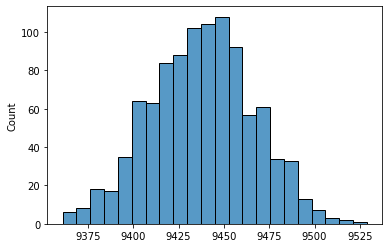

In [92]:
sns.histplot(sample_mean_male)

In [93]:
n=30000
st_dev_male=np.std(wal_male["Purchase"])
st_dev_male

5092.180063635943

In [94]:
std_err_male=st_dev_male/np.sqrt(n)

In [95]:
from scipy.stats import norm
#for 90% confidence interval
z=norm.ppf(0.95)
x1=9437.52-z*std_err_male
x2=9437.52+z*std_err_male
x1,x2

(9389.161771649193, 9485.878228350808)

In [73]:
# female analysis
wal_female["Purchase"].mean()

8734.565765155476

In [74]:
wal_female.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.358090e+05,135809.000000,135809.000000,135809.000000,135809.000000
mean,1.003130e+06,6.740540,0.419619,5.717714,8734.565765
std,1.786631e+03,6.239639,0.493498,3.696752,4767.233289
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001569e+06,1.000000,0.000000,3.000000,5433.000000
50%,1.003159e+06,4.000000,0.000000,5.000000,7914.000000
75%,1.004765e+06,11.000000,1.000000,8.000000,11400.000000
max,1.006039e+06,20.000000,1.000000,20.000000,23959.000000


In [76]:
np.mean(wal_female["Purchase"].sample(30000))

8765.002833333334

In [77]:
sample_mean_female=[(np.mean(wal_female["Purchase"].sample(30000))) for i in range(1000)]

<AxesSubplot:ylabel='Count'>

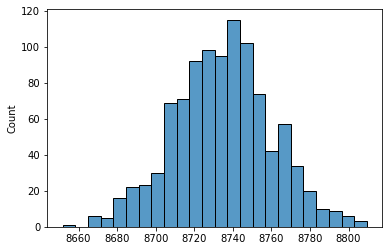

In [78]:
sns.histplot(sample_mean_female)

In [79]:
np.mean(sample_mean_female)

8734.801626200002

In [96]:
n=30000
st_dev_female=np.std(wal_female["Purchase"])
std_err_female=st_dev_female/np.sqrt(n)
#for 90% confidence interval
z=norm.ppf(0.95)
x1=8734.80-z*std_err_female
x2=8734.80+z*std_err_female
x1,x2

(8689.527817089016, 8780.072182910983)

In [ ]:
# for 95% confidence interval

In [97]:
#for Males
n=30000
st_dev_male=np.std(wal_male["Purchase"])
std_err_male=st_dev_male/np.sqrt(n)
#for 90% confidence interval
z=norm.ppf(0.975)
x1=9437.52-z*std_err_male
x2=9437.52+z*std_err_male
x1,x2

(9379.897616846425, 9495.142383153576)

In [98]:
# for females
n=30000
st_dev_female=np.std(wal_female["Purchase"])
std_err_female=st_dev_female/np.sqrt(n)
#for 90% confidence interval
z=norm.ppf(0.975)
x1=8734.80-z*std_err_female
x2=8734.80+z*std_err_female
x1,x2

(8680.854866795966, 8788.745133204033)

In [ ]:
# for 99% confidence interval

In [99]:
#for Males
n=30000
st_dev_male=np.std(wal_male["Purchase"])
std_err_male=st_dev_male/np.sqrt(n)
#for 90% confidence interval
z=norm.ppf(0.995)
x1=9437.52-z*std_err_male
x2=9437.52+z*std_err_male
x1,x2

(9361.791351801328, 9513.248648198673)

In [100]:
# for females
n=30000
st_dev_female=np.std(wal_female["Purchase"])
std_err_female=st_dev_female/np.sqrt(n)
#for 90% confidence interval
z=norm.ppf(0.975)
x1=8734.80-z*std_err_female
x2=8734.80+z*std_err_female
x1,x2

(8680.854866795966, 8788.745133204033)

In [106]:
#Analysis for Married and Unmarried
wal_mar=wal[wal["Marital_Status"]==1]
wal_mar.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,2.253370e+05,225337.000000,225337.0,225337.000000,225337.000000
mean,1.003071e+06,8.266823,1.0,5.498245,9261.174574
std,1.765091e+03,6.687118,0.0,3.968868,5016.897378
min,1.000004e+06,0.000000,1.0,1.000000,12.000000
25%,1.001506e+06,2.000000,1.0,2.000000,5843.000000
50%,1.003093e+06,7.000000,1.0,5.000000,8051.000000
75%,1.004647e+06,14.000000,1.0,8.000000,12042.000000
max,1.006039e+06,20.000000,1.0,20.000000,23961.000000


In [107]:
wal_unmar=wal[wal["Marital_Status"]==0]
wal_unmar.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,3.247310e+05,324731.000000,324731.0,324731.000000,324731.000000
mean,1.002999e+06,7.944782,0.0,5.339059,9265.907619
std,1.700466e+03,6.402753,0.0,3.912070,5027.347859
min,1.000001e+06,0.000000,0.0,1.000000,12.000000
25%,1.001524e+06,3.000000,0.0,1.000000,5605.000000
50%,1.003065e+06,7.000000,0.0,5.000000,8044.000000
75%,1.004386e+06,14.000000,0.0,8.000000,12061.000000
max,1.006040e+06,20.000000,0.0,20.000000,23961.000000


In [114]:
np.mean(wal_mar["Purchase"].sample(30000))
sample_mean_mar=[(np.mean(wal_mar["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_mar=np.std(wal_mar["Purchase"])
std_err_mar=st_dev_mar/np.sqrt(n)
#for 90% confidence interval
mean_mar=np.mean(wal_mar["Purchase"])
z=norm.ppf(0.95)
x1=mean_mar-z*std_err_mar
x2=mean_mar+z*std_err_mar
x1,x2

(9213.531378505573, 9308.817769659174)

In [115]:
np.mean(wal_unmar["Purchase"].sample(30000))
sample_mean_unmar=[(np.mean(wal_unmar["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_unmar=np.std(wal_unmar["Purchase"])
std_err_unmar=st_dev_unmar/np.sqrt(n)
mean_unmar=np.mean(wal_unmar["Purchase"])
#for 90% confidence interval
z=norm.ppf(0.95)
x1=mean_unmar-z*std_err_unmar
x2=mean_unmar+z*std_err_unmar
x1,x2


(9218.165147449665, 9313.650090393348)

In [116]:
np.mean(wal_mar["Purchase"].sample(30000))
sample_mean_mar=[(np.mean(wal_mar["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_mar=np.std(wal_mar["Purchase"])
std_err_mar=st_dev_mar/np.sqrt(n)
#for 95% confidence interval
mean_mar=np.mean(wal_mar["Purchase"])
z=norm.ppf(0.975)
x1=mean_mar-z*std_err_mar
x2=mean_mar+z*std_err_mar
x1,x2

(9204.404205030149, 9317.944943134598)

In [117]:
np.mean(wal_unmar["Purchase"].sample(30000))
sample_mean_unmar=[(np.mean(wal_unmar["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_unmar=np.std(wal_unmar["Purchase"])
std_err_unmar=st_dev_unmar/np.sqrt(n)
mean_unmar=np.mean(wal_unmar["Purchase"])
#for 95% confidence interval
z=norm.ppf(0.975)
x1=mean_unmar-z*std_err_unmar
x2=mean_unmar+z*std_err_unmar
x1,x2


(9209.018955344087, 9322.796282498926)

In [119]:
np.mean(wal_mar["Purchase"].sample(30000))
sample_mean_mar=[(np.mean(wal_mar["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_mar=np.std(wal_mar["Purchase"])
std_err_mar=st_dev_mar/np.sqrt(n)
#for 99% confidence interval
mean_mar=np.mean(wal_mar["Purchase"])
z=norm.ppf(0.995)
x1=mean_mar-z*std_err_mar
x2=mean_mar+z*std_err_mar
x1,x2

(9186.565662218964, 9335.783485945783)

In [120]:
np.mean(wal_unmar["Purchase"].sample(30000))
sample_mean_unmar=[(np.mean(wal_unmar["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_unmar=np.std(wal_unmar["Purchase"])
std_err_unmar=st_dev_unmar/np.sqrt(n)
mean_unmar=np.mean(wal_unmar["Purchase"])
#for 99% confidence interval
z=norm.ppf(0.995)
x1=mean_unmar-z*std_err_unmar
x2=mean_unmar+z*std_err_unmar
x1,x2

(9191.143241699116, 9340.671996143898)

In [ ]:
# Analysis for age


In [162]:
age0_17=wal[wal["Age"]=="0-17"]
age18_25=wal[wal["Age"]=="18-25"]
age26_35=wal[wal["Age"]=="26-35"]
age36_50=pd.concat([wal[wal["Age"]=="36-45"] , wal[wal["Age"]=="46-50" ]])
age50plus=pd.concat([wal[wal["Age"]=="51-55"] , wal[wal["Age"]=="55+" ]])

In [154]:
#90% confidence interval analysis

In [155]:
np.mean(age0_17["Purchase"].sample(3000))
sample_mean_age0_17=[(np.mean(age0_17["Purchase"].sample(3000))) for i in range(1000)]
n=3000
st_dev_age0_17=np.std(age0_17["Purchase"])
std_err_age0_17=st_dev_age0_17/np.sqrt(n)
mean_age0_17=np.mean(age0_17["Purchase"])
#for 90% confidence interval
z=norm.ppf(0.95)
x1=mean_age0_17-z*std_err_age0_17
x2=mean_age0_17+z*std_err_age0_17
x1,x2



(8779.978974850774, 9086.950306039174)

In [156]:
age18_25.shape

(99660, 10)

In [157]:
#for age range 18_25
np.mean(age18_25["Purchase"].sample(3000))
sample_mean_age18_25=[(np.mean(age18_25["Purchase"].sample(3000))) for i in range(1000)]
n=3000
st_dev_age18_25=np.std(age18_25["Purchase"])
std_err_age18_25=st_dev_age18_25/np.sqrt(n)
mean_age18_25=np.mean(age18_25["Purchase"])
#for 90% confidence interval
z=norm.ppf(0.95)
x1=mean_age18_25-z*std_err_age18_25
x2=mean_age18_25+z*std_err_age18_25
x1,x2


(9018.47974249923, 9320.847470023347)

In [158]:
#for age range 26_35
np.mean(age26_35["Purchase"].sample(30000))
sample_mean_age26_35=[(np.mean(age26_35["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age26_35=np.std(age26_35["Purchase"])
std_err_age26_35=st_dev_age26_35/np.sqrt(n)
mean_age26_35=np.mean(age26_35["Purchase"])
#for 90% confidence interval
z=norm.ppf(0.95)
x1=mean_age26_35-z*std_err_age26_35
x2=mean_age26_35+z*std_err_age26_35
x1,x2


(9205.10793376461, 9300.273331975166)

In [159]:
age36_50.shape

(155714, 10)

In [160]:
#for age range 36_50
np.mean(age36_50["Purchase"].sample(30000))
sample_mean_age36_50=[(np.mean(age36_50["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age36_50=np.std(age36_50["Purchase"])
std_err_age36_50=st_dev_age36_50/np.sqrt(n)
mean_age36_50=np.mean(age36_50["Purchase"])
#for 90% confidence interval
z=norm.ppf(0.95)
x1=mean_age36_50-z*std_err_age36_50
x2=mean_age36_50+z*std_err_age36_50
x1,x2


(9247.78320900821, 9342.880276612863)

In [163]:
#for age range 50plus
np.mean(age50plus["Purchase"].sample(30000))
sample_mean_age50plus=[(np.mean(age50plus["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age50plus=np.std(age50plus["Purchase"])
std_err_age50plus=st_dev_age50plus/np.sqrt(n)
mean_age50plus=np.mean(age50plus["Purchase"])
#for 90% confidence interval
z=norm.ppf(0.95)
x1=mean_age50plus-z*std_err_age50plus
x2=mean_age50plus+z*std_err_age50plus
x1,x2


(9415.598420431128, 9511.724935955841)

In [ ]:
#95% confidence interval analysis

In [165]:
np.mean(age0_17["Purchase"].sample(3000))
sample_mean_age0_17=[(np.mean(age0_17["Purchase"].sample(3000))) for i in range(1000)]
n=3000
st_dev_age0_17=np.std(age0_17["Purchase"])
std_err_age0_17=st_dev_age0_17/np.sqrt(n)
mean_age0_17=np.mean(age0_17["Purchase"])
#for 95% confidence interval
z=norm.ppf(0.975)
x1=mean_age0_17-z*std_err_age0_17
x2=mean_age0_17+z*std_err_age0_17
x1,x2


(8750.575189506208, 9116.35409138374)

In [166]:
#for age range 18_25
np.mean(age18_25["Purchase"].sample(30000))
sample_mean_age18_25=[(np.mean(age18_25["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age18_25=np.std(age18_25["Purchase"])
std_err_age18_25=st_dev_age18_25/np.sqrt(n)
mean_age18_25=np.mean(age18_25["Purchase"])
#for 95% confidence interval
z=norm.ppf(0.975)
x1=mean_age18_25-z*std_err_age18_25
x2=mean_age18_25+z*std_err_age18_25
x1,x2


(9112.696222544599, 9226.630989977979)

In [167]:
#for age range 26_35
np.mean(age26_35["Purchase"].sample(30000))
sample_mean_age26_35=[(np.mean(age26_35["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age26_35=np.std(age26_35["Purchase"])
std_err_age26_35=st_dev_age26_35/np.sqrt(n)
mean_age26_35=np.mean(age26_35["Purchase"])
#for 95% confidence interval
z=norm.ppf(0.975)
x1=mean_age26_35-z*std_err_age26_35
x2=mean_age26_35+z*std_err_age26_35
x1,x2


(9195.99234980965, 9309.388915930125)

In [168]:
#for age range 36_50
np.mean(age36_50["Purchase"].sample(30000))
sample_mean_age36_50=[(np.mean(age36_50["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age36_50=np.std(age36_50["Purchase"])
std_err_age36_50=st_dev_age36_50/np.sqrt(n)
mean_age36_50=np.mean(age36_50["Purchase"])
#for 95% confidence interval
z=norm.ppf(0.975)
x1=mean_age36_50-z*std_err_age36_50
x2=mean_age36_50+z*std_err_age36_50
x1,x2


(9238.674170219734, 9351.989315401339)

In [169]:
#for age range 50plus
np.mean(age50plus["Purchase"].sample(30000))
sample_mean_age50plus=[(np.mean(age50plus["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age50plus=np.std(age50plus["Purchase"])
std_err_age50plus=st_dev_age50plus/np.sqrt(n)
mean_age50plus=np.mean(age50plus["Purchase"])
#for 95% confidence interval
z=norm.ppf(0.975)
x1=mean_age50plus-z*std_err_age50plus
x2=mean_age50plus+z*std_err_age50plus
x1,x2


(9406.390774174824, 9520.932582212145)

In [170]:
#99% confidence interval analysis

In [172]:
np.mean(age0_17["Purchase"].sample(3000))
sample_mean_age0_17=[(np.mean(age0_17["Purchase"].sample(3000))) for i in range(1000)]
n=3000
st_dev_age0_17=np.std(age0_17["Purchase"])
std_err_age0_17=st_dev_age0_17/np.sqrt(n)
mean_age0_17=np.mean(age0_17["Purchase"])
#for 99% confidence interval
z=norm.ppf(0.995)
x1=mean_age0_17-z*std_err_age0_17
x2=mean_age0_17+z*std_err_age0_17
x1,x2


(8693.107159004521, 9173.822121885427)

In [173]:
#for age range 18_25
np.mean(age18_25["Purchase"].sample(30000))
sample_mean_age18_25=[(np.mean(age18_25["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age18_25=np.std(age18_25["Purchase"])
std_err_age18_25=st_dev_age18_25/np.sqrt(n)
mean_age18_25=np.mean(age18_25["Purchase"])
#for 99% confidence interval
z=norm.ppf(0.995)
x1=mean_age18_25-z*std_err_age18_25
x2=mean_age18_25+z*std_err_age18_25
x1,x2


(9094.795773239142, 9244.531439283435)

In [174]:
#for age range 26_35
np.mean(age26_35["Purchase"].sample(30000))
sample_mean_age26_35=[(np.mean(age26_35["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age26_35=np.std(age26_35["Purchase"])
std_err_age26_35=st_dev_age26_35/np.sqrt(n)
mean_age26_35=np.mean(age26_35["Purchase"])
#for 99% confidence interval
z=norm.ppf(0.995)
x1=mean_age26_35-z*std_err_age26_35
x2=mean_age26_35+z*std_err_age26_35
x1,x2


(9178.176458058791, 9327.204807680984)

In [175]:
#for age range 36_50
np.mean(age36_50["Purchase"].sample(30000))
sample_mean_age36_50=[(np.mean(age36_50["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age36_50=np.std(age36_50["Purchase"])
std_err_age36_50=st_dev_age36_50/np.sqrt(n)
mean_age36_50=np.mean(age36_50["Purchase"])
#for 99% confidence interval
z=norm.ppf(0.995)
x1=mean_age36_50-z*std_err_age36_50
x2=mean_age36_50+z*std_err_age36_50
x1,x2


(9220.87107062549, 9369.792414995583)

In [176]:
#for age range 50plus
np.mean(age50plus["Purchase"].sample(30000))
sample_mean_age50plus=[(np.mean(age50plus["Purchase"].sample(30000))) for i in range(1000)]
n=30000
st_dev_age50plus=np.std(age50plus["Purchase"])
std_err_age50plus=st_dev_age50plus/np.sqrt(n)
mean_age50plus=np.mean(age50plus["Purchase"])
#for 99% confidence interval
z=norm.ppf(0.995)
x1=mean_age50plus-z*std_err_age50plus
x2=mean_age50plus+z*std_err_age50plus
x1,x2


(9388.394951878296, 9538.928404508673)